## Dostop do NCBI

Zbirka [NCBI](https://www.ncbi.nlm.nih.gov) obsega raznolike baze, vključno z genomi v obliki [GENBANK](https://www.ncbi.nlm.nih.gov/Sitemap/samplerecord.html). V Biopythonu dostopamo do zbirke z uporabo modula `Entrez`.

In [1]:
from Bio import SeqIO

In [2]:
from Bio import Entrez
Entrez.email = 'moj.mail@naslovu.si'

Naložimo zapis človeškega mitohondrija, recimo [NC_012920.1](https://www.ncbi.nlm.nih.gov/nuccore/NC_012920.1).

"gb" je okrajšava za "genbank".

In [3]:
handle = Entrez.efetch(db='nucleotide', rettype='gb', id='NC_012920.1')

rec = SeqIO.read(handle, "gb")

### <font color="green"><b>Vaja</b></font>

Uporabite funkciji `plotAT` in `plotCG` in izrišite mitohondrijski genom.

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

def plotAT(s, k):
    cns = []
    for i in range(len(s)-k):
        cns.append(s[i:i+k].count('A')+s[i:i+k].count('T'))
    plt.plot(cns)
    return cns

def plotCG(s, k):
    s = str(s)
    cns = []
    for i in range(len(s)-k):
        cns.append(s[i:i+k].count('CG')+s[i:i+k].count('GC'))
    plt.plot(cns)
    return cns

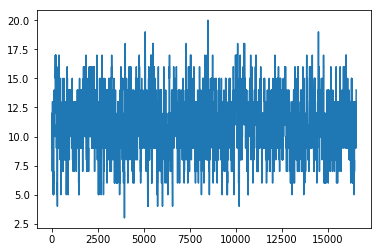

In [5]:
plotAT(rec.seq, 20);

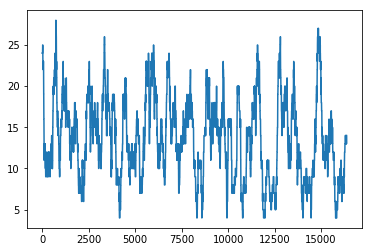

In [6]:
plotCG(rec.seq, 200);

Zapisi genbank vsebujejo tudi podatke o genskih modelih:

In [7]:
for feature in rec.features:
    print(feature)

type: source
location: [0:16569](+)
qualifiers:
    Key: country, Value: ['United Kingdom: Great Britain']
    Key: db_xref, Value: ['taxon:9606']
    Key: isolation_source, Value: ['caucasian']
    Key: mol_type, Value: ['genomic DNA']
    Key: note, Value: ['this is the rCRS']
    Key: organelle, Value: ['mitochondrion']
    Key: organism, Value: ['Homo sapiens']
    Key: tissue_type, Value: ['placenta']

type: D-loop
location: join{[0:576](-), [16023:16569](-)}
qualifiers:

type: gene
location: [576:647](+)
qualifiers:
    Key: db_xref, Value: ['GeneID:4558', 'HGNC:HGNC:7481', 'MIM:590070']
    Key: gene, Value: ['TRNF']
    Key: nomenclature, Value: ['Official Symbol: MT-TF | Name: mitochondrially encoded tRNA phenylalanine | Provided by: HGNC:HGNC:7481']

type: tRNA
location: [576:647](+)
qualifiers:
    Key: anticodon, Value: ['(pos:611..613,aa:Phe,seq:gaa)']
    Key: codon_recognized, Value: ['UUC']
    Key: db_xref, Value: ['GeneID:4558', 'HGNC:HGNC:7481', 'MIM:590070']
    Key

In [8]:
for feature in rec.features:
    print(feature.type)
    print(feature.location)
    print()

source
[0:16569](+)

D-loop
join{[0:576](-), [16023:16569](-)}

gene
[576:647](+)

tRNA
[576:647](+)

gene
[647:1601](+)

rRNA
[647:1601](+)

STS
[1477:2187](+)

gene
[1601:1670](+)

tRNA
[1601:1670](+)

gene
[1670:3229](+)

rRNA
[1670:3229](+)

STS
[2061:2203](+)

STS
[2711:2884](+)

STS
[2805:2946](+)

misc_feature
[3106:3107](+)

gene
[3229:3304](+)

tRNA
[3229:3304](+)

gene
[3306:4262](+)

CDS
[3306:4262](+)

STS
[3739:3834](+)

STS
[4188:4813](+)

gene
[4262:4331](+)

tRNA
[4262:4331](+)

gene
[4328:4400](-)

tRNA
[4328:4400](-)

gene
[4401:4469](+)

tRNA
[4401:4469](+)

gene
[4469:5511](+)

CDS
[4469:5511](+)

STS
[4480:5456](+)

gene
[5511:5579](+)

tRNA
[5511:5579](+)

gene
[5586:5655](-)

tRNA
[5586:5655](-)

gene
[5656:5729](-)

tRNA
[5656:5729](-)

gene
[5760:5826](-)

tRNA
[5760:5826](-)

gene
[5825:5891](-)

tRNA
[5825:5891](-)

gene
[5903:7445](+)

CDS
[5903:7445](+)

STS
[6317:6918](+)

STS
[7124:7672](+)

STS
[7165:7361](+)

STS
[7357:7937](+)

STS
[7385:7513](+)

gene

Za filogenetske primerjave je zanimiva t.i. regija [HVR oz. D-loop](https://en.wikipedia.org/wiki/Hypervariable_region).

### <font color="green"><b>Vaja</b></font>

Napišite funkcijo `get_Dloop(rec)`, ki bo za dani zapis oblike `genbank` vrnila zaporedje področja HVR. V primeru več takih regij vrnite prvo.

In [9]:
def get_Dloop(rec):
    dloops = [f for f in rec.features if f.type == 'D-loop']
    return dloops[0]

In [10]:
hvr = get_Dloop(rec)
print(len(hvr))

1122


Zdaj, ko imamo zapis te regije, lahko pridobimo zaporedje:

In [11]:
hvr_seq = hvr.extract(rec)

In [12]:
len(hvr_seq)

1122

Regija je v tem primeru dolga 1122 baz.

### <font color="green"><b>Vaja</b></font>

Napišite funkcijo `codon_frequency(rec)`, ki za kodirajoče gene v danem zapisu `rec` oblike `genbank` vrne frekvenco kodonov. <b>Namig:</b> glej zapise tipa `CDS`.

In [13]:
def codon_frequency(rec):
    ret_d = {}
    for f in rec.features:
        if f.type == 'CDS':
            seq = f.extract(rec)
            for i in range(0, len(seq)-3, 3):
                codon = str(seq[i:i+3].seq)
                ret_d[codon] = ret_d.get(codon, 0) + 1
    return ret_d            

In [14]:
codon_frequency(rec)

{'ATA': 167,
 'CCC': 119,
 'ATG': 40,
 'GCC': 124,
 'AAC': 132,
 'CTC': 167,
 'CTA': 276,
 'ATT': 124,
 'GTA': 70,
 'ATC': 196,
 'GCA': 80,
 'TTC': 139,
 'CTT': 65,
 'ACC': 155,
 'GAA': 64,
 'CGA': 28,
 'AAA': 85,
 'GGC': 87,
 'TAT': 46,
 'CAA': 82,
 'CGC': 26,
 'GTT': 31,
 'TAC': 89,
 'GGG': 34,
 'GCT': 43,
 'GAC': 51,
 'GAG': 24,
 'ACA': 134,
 'TCT': 32,
 'CCG': 7,
 'TTA': 73,
 'TGA': 93,
 'CTG': 45,
 'GTC': 48,
 'TTT': 77,
 'AGC': 39,
 'TCA': 83,
 'AGT': 14,
 'TCC': 99,
 'CAC': 79,
 'CCA': 52,
 'TTG': 18,
 'ACT': 52,
 'GGA': 67,
 'CCT': 41,
 'AAG': 10,
 'AAT': 32,
 'GCG': 8,
 'TCG': 7,
 'CGT': 7,
 'ACG': 10,
 'GGT': 24,
 'CAG': 8,
 'TGG': 11,
 'CAT': 18,
 'GAT': 15,
 'GTG': 18,
 'TGC': 17,
 'TGT': 5,
 'CGG': 2}